### Шаг 1: Подготовка данных


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'yt': [60777, 63760, 78424, 58576, 37662, 102812, 127025, 137191, 134834, 98916, 85707, 80682, 55509, 62449]
}
df = pd.DataFrame(data)
df.head()

,t,yt
0,1,60777
1,2,63760
2,3,78424
3,4,58576
4,5,37662


### Шаг 2: Расчёт частот, коэффициентов и спектральной плотности

Для вычисления периодограммы и спектральной плотности выполните следующие действия:

1. Рассчитайте частоту: $f_i = i / T$, где T - общее количество наблюдений.
2. Рассчитайте веса (wi): $w_i = 2 * π * f_i$.
3. Рассчитайте коэффициенты ai и bi: ai и bi - коэффициенты Фурье.
4. Рассчитайте спектральную плотность:.


In [106]:

# Общее количество наблюдений
T = len(df)

# Заполним f и wi
df['fi'] = df.index / T
df['wi'] = 2 * np.pi * df['fi']

# Рассчитываем ai и bi
def get_ai_bi(df, w):
    ai_sum = 0
    bi_sum = 0
    for t, yt in zip(df['t'], df['yt']):
        ai_sum += yt * np.cos(w * t)
        bi_sum += yt * np.sin(w * t)
    ai = (2 / T) * ai_sum
    bi = (2 / T) * bi_sum
    return ai, bi

# Применяем функцию к каждому wi
df['ai'], df['bi'] = zip(*df['wi'].map(lambda w: get_ai_bi(df, w)))

# Спектральная плотность: I(f) = (T / 2) * (a_i^2 + b_i^2)
df['I(f)'] = (T / 2) * (df['ai']**2 + df['bi']**2)
df.head()

,t,yt,fi,wi,ai,bi,I(f)
0,1,60777,0.000000,0.000000,169189.142857,0.000000,2.003748e+11
1,2,63760,0.071429,0.448799,-27436.461693,-21180.294665,8.409550e+09
2,3,78424,0.142857,0.897598,7331.272578,17654.018929,2.557884e+09
3,4,58576,0.214286,1.346397,-10138.455794,-5807.356728,9.555957e+08
4,5,37662,0.285714,1.795196,3595.661207,-3144.458064,1.597148e+08


### Шаг 3: Построение периодограммы


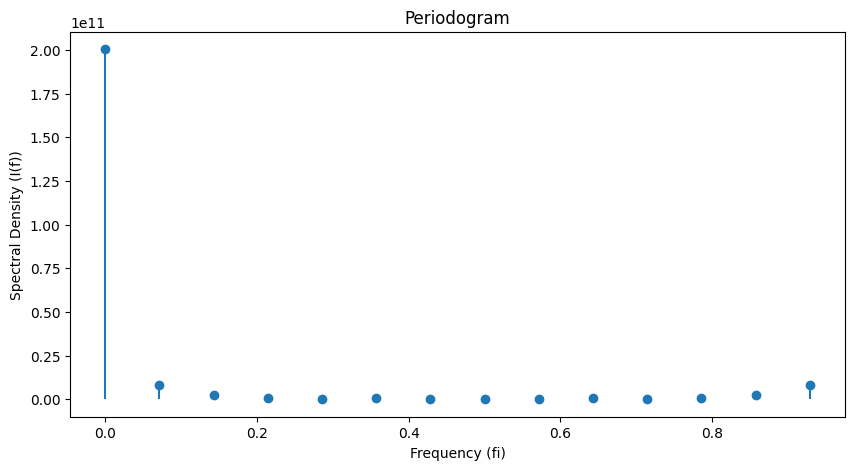

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.stem(df['fi'], df['I(f)'], basefmt=" ")
plt.xlabel('Frequency (fi)')
plt.ylabel('Spectral Density (I(f))')
plt.title('Periodogram')
plt.show()

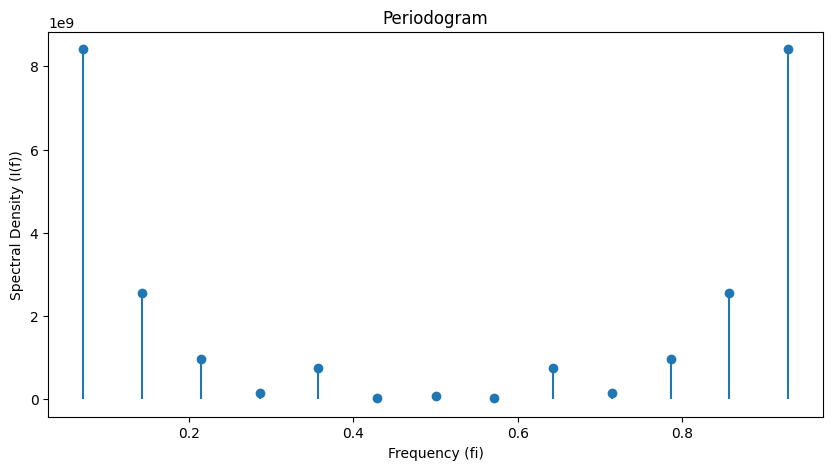

In [108]:
import matplotlib.pyplot as plt
df1 = df[1:]
plt.figure(figsize=(10, 5))
plt.stem(df1['fi'], df1['I(f)'], basefmt=" ")
plt.xlabel('Frequency (fi)')
plt.ylabel('Spectral Density (I(f))')
plt.title('Periodogram')
plt.show()

### Шаг 4: Интерпретация результатов

Для интерпретации результатов нам нужно определить период сезонных колебаний. Эту информацию можно извлечь из критических значений спектральной плотности.


In [109]:
# Найдём частоту, где значение спектральной плотности максимально
max_i_f_index = df1['I(f)'].idxmax()
max_freq = df.loc[max_i_f_index, 'fi']

# Для облегчения интерпретации: Период T = 1 / f
period = 1 / max_freq

print(f'Max Frequency: {max_freq}')
print(f'Period of Seasonality: {period}')

Max Frequency: 0.07142857142857142
Period of Seasonality: 14.0


понять, почему сезонность равняется 14 сложно, в задании не сказано в чём измеряется время. ожидаемые сезонности 12 (месяцы), красивые даты. период 7 указывал бы на выходные и сезонность в рамках недели. период 27 - мог быть вызван длиной поколнения (много браков => много детей), много детей сейчас => много браков через 27 лет.   

# PART 2

In [110]:
# Данные
data = [
    100792.9, 92358.61, 91367.64, 82094.49, 77907.31, 71758.2, 73793.06, 75025.16, 78660.02, 86099,
    86508.7, 94602.12, 93054.2, 85054.4, 87560.6, 77639.1, 71211.7, 66862, 69610.5, 70047.3,
    72304.2, 83666.8, 88540.1, 98825.3, 100047.7, 90200.7, 92265.5, 80454, 74764.1, 70444.7,
    73450.6, 74663.3, 75854.4, 86992.7, 89260.5, 101226.5, 99743.9, 91379.9, 93973.9, 82379.2,
    76542.4, 71714.5, 74994.8, 75036.1, 76306.8, 86341.7, 93260.3, 99547, 99852.4, 97731.8, 95236.5,
    81921.6, 77326.4, 72896.8, 75600.6, 76707.5, 76958.4, 87237.8, 92123.6, 104656.7, 101374.3,
    90259.6, 96404.2, 84236.5, 78080.4, 73178.2, 75356, 75978.1, 78462.7, 89491.6, 89330.2,
    99196.7, 99862.74, 91610.92, 92031.5, 82975.7, 78453, 73488.6, 75799.8, 76952, 78129.9,
    90766.5, 93713.5, 101545.3, 100245, 90106.96, 93624.65, 84779.18, 78213.63, 74009.34,
    76563.82, 77330.18, 78069.77, 90363.15, 93776.02, 99262.63, 102404.7, 91667.11, 93411.33,
    83030.15, 78645.51, 75128.03, 77591.43, 79386.35, 79426.96, 91665.71, 97293.66, 104674.4,
    102648.1, 92393, 94303.22, 85846.48, 81631.73, 76050.55, 78297.75, 80345.28, 80494.64,
    91568.9, 94369.1, 101739.6, 102572.6, 93964.03, 99805.73, 86481.47, 81626.85, 77917.55,
    80850.99, 80861.47, 80235.48, 90100.32, 96251.38, 105494.5, 103830.2, 93233.41, 96587.85,
    86752.05, 81952.93, 78688.07, 80179.69, 81315.58, 82232.11, 91205.33, 96653.48, 102691.5,
    100576.1, 94648.65, 95123.93, 84325.46, 77587.62, 74069.31, 78161.59, 78518.19, 79799.06,
    88730.69, 93905.75, 104976.1, 104726.7, 96728.2, 100109.4, 88532.88, 83240.89, 79686.1,
    83273.27, 83572.78, 84897.88, 94444.04, 98573.49, 109380, 108570.4, 96477.17
]

# Создание DataFrame
df = pd.DataFrame(data, columns=['value'])

# Добавление столбца 't'
df['t'] = df.index + 1

# Перестановка столбцов
df = df[['t', 'value']]

# Вывод первых строк DataFrame
df.head()

,t,value
0,1,100792.90
1,2,92358.61
2,3,91367.64
3,4,82094.49
4,5,77907.31


### Шаг 2: Построение графика ряда и описание данных (2.1)


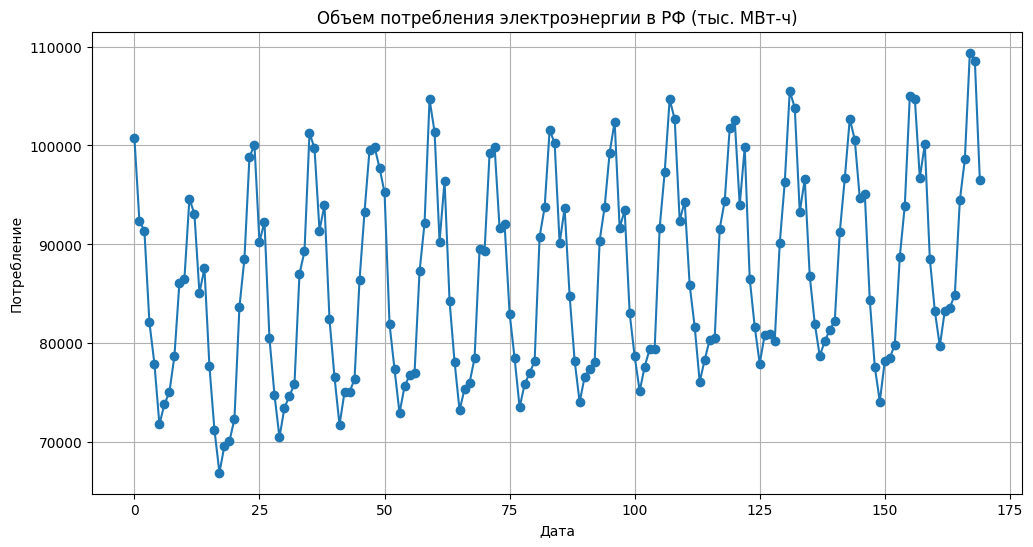

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df['value'], marker='o')
plt.title('Объем потребления электроэнергии в РФ (тыс. МВт-ч)')
plt.xlabel('Дата')
plt.ylabel('Потребление')
plt.grid(True)
plt.show()

#### Описание:

Исходные данные представляют собой ежемесячное потребление электроэнергии в России (в тысячах МВт-ч) за период с 2008 по 2022 год. Из данного графика видно, что данные обладают сезонностью и некоторым трендом.


### Шаг 3: Исследование наличия сезонности (2.2)

#### График сезонной волны:


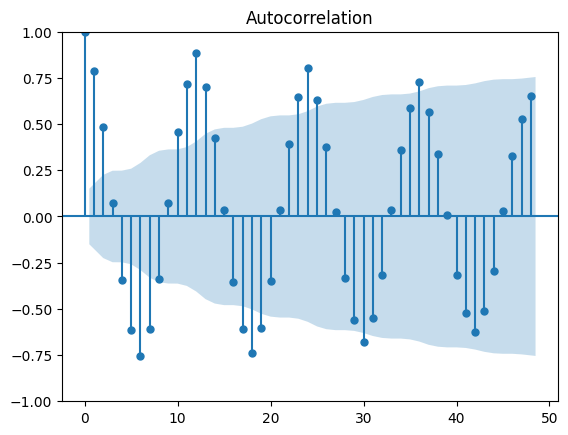

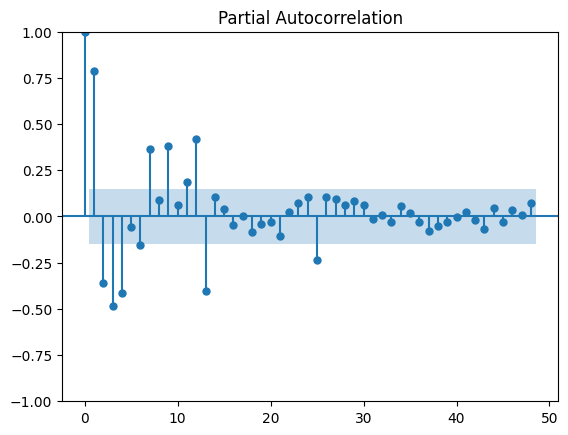

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# График ACF (функция автокорреляции)
plot_acf(df['value'], lags=48)
plt.show()

# График PACF (частичная функция автокорреляции)
plot_pacf(df['value'], lags=48)
plt.show()

#### Интерпретация:

- На графиках ACF и PACF прослеживается значительная сезонность, особенно на лагах, кратных 12, что соответствует годовому циклу.


### Шаг 4: Построение периодограммы (2.2)


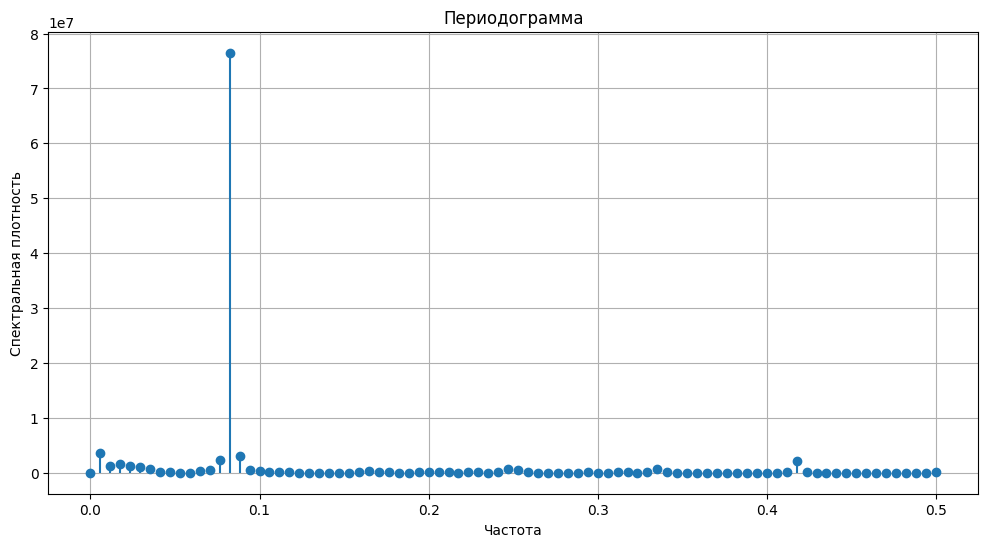

In [60]:
from scipy.signal import periodogram

# Расчёт периодограммы
freqs, power = periodogram(df['value'], scaling='spectrum')

# Построение периодограммы
plt.figure(figsize=(12, 6))
plt.stem(freqs, power, basefmt=" ")
plt.xlabel('Частота')
plt.ylabel('Спектральная плотность')
plt.title('Периодограмма')
plt.grid(True)
plt.show()

### Шаг 5: Модель с сезонными фиктивными переменными (2.3)


In [113]:
import statsmodels.api as sm
# Преобразование столбцов в числовой формат (на всякий случай)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['t'] = pd.to_numeric(df['t'], errors='coerce')

# Добавим колонку 'Month', которая будет иметь значения от 1 до 12
df['Month'] = (df['t'] % 12) + 1

# Создаём фиктивные переменные для месяцев
dummies = pd.get_dummies(df['Month'], prefix='Month')

# Объединяем фиктивные переменные с основным DataFrame
df = pd.concat([df, dummies], axis=1)

# Модель с включением всех фиктивных переменных (кроме одного месяца)
X = df.drop(['value', 't', 'Month'], axis=1)
X = sm.add_constant(X)
y = df['value']

X = X.astype(int)


# # Строим модель
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           3.18e-73
Time:                        18:57:08   Log-Likelihood:                -1610.9
No. Observations:                 170   AIC:                             3246.
Df Residuals:                     158   BIC:                             3283.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.012e+04    231.779    345.671      0.0

### Результаты обучения регрессии с сезонными фиктивными переменными

#### Построенные модель:

#### Основные показатели модели:

1. R-квадрат (R^2): 0.896
   - Это означает, что модель объясняет около 89.6% вариации в данных.

2. Скорректированный R-квадрат (Adjusted R^2): 0.889
   - Эти значения учитывают количество независимых переменных в модели и также показывают высокую степень объяснительной способности модели.

3. F-статистика: 124.1 с p-значением 8.81e-72
   - Это указывает на высокую значимость модели в целом.



### Шаг 6: Модель с гармоническими переменными


In [42]:

# Создаем гармонические переменные
df['sin1'] = np.sin(2 * np.pi * df['t'] / 12)
df['cos1'] = np.cos(2 * np.pi * df['t'] / 12)
df['sin2'] = np.sin(4 * np.pi * df['t'] / 12)
df['cos2'] = np.cos(4 * np.pi *

df['t'] / 12)

# Модель с гармоническими переменными
X = df[['sin1', 'cos1', 'sin2', 'cos2']]
X = sm.add_constant(X)
y = df['value']

# Строим модель
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.14e-67
Time:                        17:56:13   Log-Likelihood:                -1644.5
No. Observations:                 170   AIC:                             3299.
Df Residuals:                     165   BIC:                             3315.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.677e+04    299.394    289.835      0.0

Результат аналогичен модели с сезонными фиктивными переменными. 

### Шаг 7: Прогноз на 1 месяц вперед
так как сезонные переменные дали немного лучшие результаты на обучающей выборке. Для прогнозирования будем использовать их

In [116]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['t'] = pd.to_numeric(df['t'], errors='coerce')

# Добавим колонку 'Month', которая будет иметь значения от 1 до 12
df['Month'] = (df['t'] % 12) + 1

# Создаём фиктивные переменные для месяцев
dummies = pd.get_dummies(df['Month'], prefix='Month')

# Объединяем фиктивные переменные с основным DataFrame
df = pd.concat([df, dummies], axis=1)

# Модель с включением всех фиктивных переменных (кроме одного месяца)
X = df.drop(['value', 't', 'Month'], axis=1)
X = sm.add_constant(X)
y = df['value']

# Преобразование булевых значений фиктивных переменных в числовые
X = X.astype(int)

# Строим модель
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           3.18e-73
Time:                        19:00:19   Log-Likelihood:                -1610.9
No. Observations:                 170   AIC:                             3246.
Df Residuals:                     158   BIC:                             3283.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.44e+04    215.224    345.671      0.0

In [114]:
# Допустим, у нас уже есть обученная модель 'model' и DataFrame 'df'

# Прогнозируем на 12 следующих месяцев
future_t = np.arange(df['t'].max() + 1, df['t'].max() + 13)  # Прогноз на следующие 12 месяцев
future_months = (future_t % 12) + 1

# Создаем DataFrame для будущих значений t и месяцев
future_df = pd.DataFrame({'t': future_t, 'Month': future_months})

# Создаем фиктивные переменные для будущих месяцев
dummies_future = pd.get_dummies(future_df['Month'], prefix='Month')

# Убедимся, что в новых данных присутствуют все фиктивные переменные, которые были в обучающей модели
all_months = [f'Month_{i}' for i in range(1, 13)]
for month in all_months:
    if month not in dummies_future:
        dummies_future[month] = 0

# Объединяем фиктивные переменные с основным DataFrame будущих значений
X_new = pd.concat([future_df, dummies_future], axis=1).drop(['t', 'Month'], axis=1)
X_new = sm.add_constant(X_new)

# Преобразование булевых значений фиктивных переменных в числовые
X_new = X_new.astype(int)

# Проверка структуры X_new на случай необходимости
X_new = X_new[X.columns]  # Ensure the columns in X_new match the columns in X

# Прогнозируем значения для новых данных
forecast_new = model.predict(X_new)

# Выводим прогнозируемые значения
print(f'Прогнозируемые значения на следующие 12 месяцев: {forecast_new}')

Прогнозируемые значения на следующие 12 месяцев: 0      94414.710714
1      83674.875714
2      78370.319286
3      73992.282143
4      76680.278571
5      77552.806429
6      78702.308571
7      89191.017143
8      93111.412857
9     101987.025000
10    101353.462667
11     92520.964000
dtype: float64


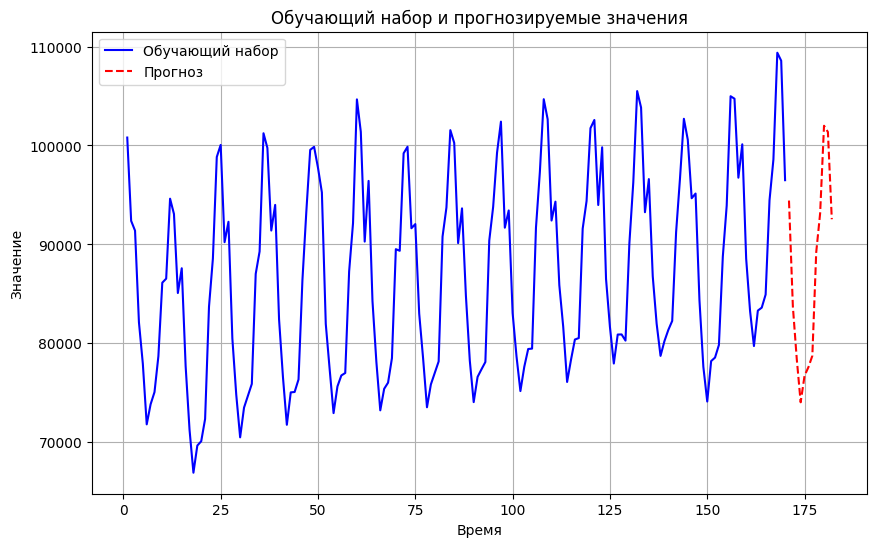

In [115]:
plt.figure(figsize=(10, 6))

# Обучающий набор данных
plt.plot(df['t'], df['value'], label='Обучающий набор', color='blue')

# Прогнозируемые значения
plt.plot(future_t, forecast_new, label='Прогноз', color='red', linestyle='--')

# Оформление графика
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Обучающий набор и прогнозируемые значения')
plt.legend()
plt.grid(True)
plt.show()